<a href="https://colab.research.google.com/github/HoarfrostRaven/Optimization-for-Machine-Learning/blob/main/OML_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Optimization with $\ell_2$ regularization

Given a (data-fitting) function $ f : \mathbb{R}^d \to \mathbb{R} $, we consider the family of problems

$$
\min_{w \in \mathbb{R}^d} f(w) + \frac{\lambda}{2} \|w\|^2,
$$

where $ \|w\|^2 = \sum_{j=1}^{d} w_j^2 $ and $ \lambda \geq 0 $ is a regularization parameter. When $ \lambda = 0 $, we recover the original problem (1). When $ \lambda \to \infty $, one can show that the problem (3) is equivalent to

$$
\min_{w \in \mathbb{R}^d} \frac{1}{2} \|w\|^2.
$$

## **Question 1.1**  

Consider the toy function
$$
f^{toy}(w) = \frac{1}{4} \|Xw - y\|^2
$$
with

$$
X = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}, \quad y = \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$

As seen in class, this function is $ C^1 $ and convex.

### **(a)**

Consider the problem  
$$
\min_{w \in \mathbb{R}^d} f^{toy}(w).
$$
Show that $ f^{toy} $ has an infinite number of global minima, and give a characterization of the set of global minima for $ f^{toy} $.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

We expand the objective function:

$$f^{toy}(w) = \frac{1}{4} \|Xw - y\|^2$$

Given

$$X = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}, \quad y = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

Compute $Xw - y$:

$$Xw - y = \begin{bmatrix} w_1 - 1 \\ -1 \end{bmatrix}$$

Therefore, the squared norm is:

$$\|Xw - y\|^2 = (w_1 - 1)^2 + 1$$

Thus,

$$f^{toy}(w) = \frac{1}{4} ((w_1 - 1)^2 + 1)$$

To minimize this function, we only need to minimize $(w_1 - 1)^2$, whose minimum value is 0, achieved at $w_1 = 1$. However, $w_2$ is unconstrained and can be any real number.

**Conclusion:**

The set of global minima is:

$$\{ w \in \mathbb{R}^2 \mid w_1 = 1, w_2 \in \mathbb{R} \}$$

### **(b)**

Consider the problem  
$$
\min_{w \in \mathbb{R}^d} f^{toy}(w) + \frac{\lambda}{2} \|w\|^2
$$
with $ \lambda > 0 $. Show that problem (6) has a unique solution.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

Consider the objective function:

$$\min_{w \in \mathbb{R}^2} \frac{1}{4} ((w_1 - 1)^2 + 1) + \frac{\lambda}{2} (w_1^2 + w_2^2)$$

Expanding:

$$g(w) = \frac{1}{4} (w_1^2 - 2w_1 + 1 + 1) + \frac{\lambda}{2} (w_1^2 + w_2^2)$$

$$= \frac{1}{4} w_1^2 - \frac{1}{2} w_1 + \frac{1}{2} + \frac{\lambda}{2} w_1^2 + \frac{\lambda}{2} w_2^2$$

Taking derivatives and setting them to zero:

  1. Taking the derivative with respect to $w_1$:  
     $$\frac{1}{2} w_1 - \frac{1}{2} + \lambda w_1 = 0$$
     $$w_1 \left(\frac{1}{2} + \lambda \right) = \frac{1}{2}$$
     $$w_1 = \frac{1}{1 + 2\lambda}$$

  2. Taking the derivative with respect to $w_2$:  
     $$\lambda w_2 = 0 \Rightarrow w_2 = 0$$

Since the objective function is strictly convex (due to the regularization term $\lambda \|w\|^2$), the solution is unique.  

**Conclusion:**  

The unique solution is:  

$$w_{\lambda} = \begin{bmatrix} \frac{1}{1 + 2\lambda} \\ 0 \end{bmatrix}$$

### **(c)**  

Suppose now that we are given a new data sample  
$$
\left( x^+ = \begin{bmatrix} -1 \\ 0 \end{bmatrix}, y^+ = 1 \right).
$$
Given a global minimum $ w_0 $ for  
$$
\min_{w \in \mathbb{R}^d} f^{toy}(w)
$$
and the global minimum $ w_{\lambda} $ for (6), show that there is a range of values for $ \lambda $ such that

$$
\frac{1}{2} \left( (x^+)^T w_{\lambda} - y^+ \right)^2 < \frac{1}{2} \left( (x^+)^T w_0 - y^+ \right).
$$

#### <span style="color:rgb(92,29,79)">Answer to question</span>

New data point:  

$$x^+ = \begin{bmatrix} -1 \\ 0 \end{bmatrix}, \quad y^+ = 1$$  

Compute the prediction error:  

$$\frac{1}{2} ([x^+]^T w - y^+)^2$$  

1. For **$w_0$** (global optimal solution of $f_{toy}$):  
   Take $w_0 = \begin{bmatrix} 1 \\ b \end{bmatrix}$ (arbitrary $b$):  
   $$x^+ w_0 = (-1)(1) + (0)(b) = -1$$  
   $$\frac{1}{2} (-1 - 1)^2 = \frac{1}{2} (4) = 2$$  

2. For **$w_{\lambda}$**:  
   Take $w_{\lambda} = \begin{bmatrix} \frac{1}{1 + 2\lambda} \\ 0 \end{bmatrix}$:  
   $$x^+ w_{\lambda} = (-1) \cdot \frac{1}{1 + 2\lambda} = -\frac{1}{1 + 2\lambda}$$  
   $$\frac{1}{2} \left(-\frac{1}{1 + 2\lambda} - 1\right)^2$$  
   $$= \frac{1}{2} \left(\frac{-1 - (1 + 2\lambda)}{1 + 2\lambda} \right)^2$$  
   $$= \frac{1}{2} \left(\frac{-2 - 2\lambda}{1 + 2\lambda} \right)^2$$  
   $$= \frac{1}{2} \left(\frac{2(1 + \lambda)}{1 + 2\lambda} \right)^2$$  
   $$= \frac{2 (1 + \lambda)^2}{(1 + 2\lambda)^2}$$  

**Requirement:**  

$$\frac{2(1+\lambda)^2}{(1+2\lambda)^2} < 2$$  

Divide both sides by 2:  

$$\frac{(1+\lambda)^2}{(1+2\lambda)^2} < 1$$  

$$(1+\lambda)^2 < (1+2\lambda)^2$$  

Taking square roots (valid since both sides are non-negative):  

$$1+\lambda < 1+2\lambda$$  

$$\lambda < 2\lambda$$  

$$0 < \lambda$$  

**Conclusion:**  

For any $\lambda > 0$, the prediction error of the regularized solution $w_{\lambda}$ is always smaller than that of $w_0$. In other words, the inequality holds universally when $\lambda > 0$.

# 2 Experiments on synthetic data

In this part, we will consider the synthetic data used in the course notebooks, in the context of linear regression.

## Implementation 2.1

Using the functions given in the lab sessions, generate two datasets for linear regression based on the same ground truth vector.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, norm, svdvals
from numpy.random import multivariate_normal, randn

In [2]:
# Generate data for linear least squares. This code is based on a generator proposed by Alexandre Gramfort (INRIA).
def simu_linreg(wtruth, n, std=1., corr=0.5):
    """
    Generation of data from a linear trend corrupted by Gaussian noise.

    Inputs
    ----------
    wtruth: np.ndarray, shape=(d,)
        Ground truth coefficients

    n: int
        Sample size

    std: float, default=1.
        Standard deviation for the noise

    corr: float, default=0.5
        Correlation for the feature matrix

    Outputs
    ------------
    X: Feature matrix
    y: Label vector

    """
    d = wtruth.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    # Main relationship
    y = X.dot(wtruth) + noise
    return X, y

In [3]:
# Generate two datasets (Question 2.1)
np.random.seed(42)
d = 50
n = 1000
w_star = (-1) ** np.arange(d) * np.exp(-np.arange(d) / 10.)  # True weight vector

In [4]:
# Generate the first dataset (X1, y1)
X1, y1 = simu_linreg(w_star, n, std=3., corr=0.1)

In [5]:
# Generate the second dataset (X2, y2)
X2, y2 = simu_linreg(w_star, n, std=3., corr=0.1)

## Implementation 2.2

Run gradient descent with and without regularization on the first instance, then compute the objective function corresponding to the second instance.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [6]:
# Linear regression problem class
class LinReg:
    def __init__(self, X, y, lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda  # Regularization coefficient

    # Compute objective function value
    def fun(self, w):
        return norm(self.X.dot(w) - self.y) ** 2 / (2. * self.n) + self.lbda * norm(w) ** 2 / 2.

    # Compute gradient
    def grad(self, w):
        return self.X.T.dot(self.X.dot(w) - self.y) / self.n + self.lbda * w

In [7]:
# Implementation of gradient descent
def gradient_descent(problem, w_init, eta=0.1, num_iters=100):
    w = w_init.copy()
    obj_vals = []

    for _ in range(num_iters):
        grad = problem.grad(w)
        w -= eta * grad
        obj_vals.append(problem.fun(w))

    return w, np.array(obj_vals)

In [8]:
w_init = np.zeros(d)

In [9]:
# 1. No regularization
pblinreg1_no_reg = LinReg(X1, y1, lbda=0)
w_no_reg, obj_vals_no_reg = gradient_descent(pblinreg1_no_reg, w_init, eta=0.1, num_iters=100)

In [10]:
# 2. Moderate regularization (λ=0.1)
pblinreg1_reg = LinReg(X1, y1, lbda=0.1)
w_reg, obj_vals_reg = gradient_descent(pblinreg1_reg, w_init, eta=0.1, num_iters=100)

In [11]:
# 3. Strong regularization (λ=1)
pblinreg1_strong_reg = LinReg(X1, y1, lbda=1)
w_strong_reg, obj_vals_strong_reg = gradient_descent(pblinreg1_strong_reg, w_init, eta=0.1, num_iters=100)

In [12]:
def objective_function(problem, w):
    return problem.fun(w)

In [13]:
# Compute objective function value on the second dataset
obj_no_reg = objective_function(LinReg(X2, y2, lbda=0), w_no_reg)
obj_reg = objective_function(LinReg(X2, y2, lbda=0), w_reg)
obj_strong_reg = objective_function(LinReg(X2, y2, lbda=0), w_strong_reg)

print(f"Objective function value without regularization: {obj_no_reg}")
print(f"Objective function value with moderate regularization: {obj_reg}")
print(f"Objective function value with strong regularization: {obj_strong_reg}")

Objective function value without regularization: 4.757613821798799
Objective function value with moderate regularization: 4.711954330450649
Objective function value with strong regularization: 5.09895385323397


In [14]:
# Observe the impact of regularization on w
print("w_no_reg mean:", np.mean(w_no_reg))
print("w_reg mean:", np.mean(w_reg))
print("w_strong_reg mean:", np.mean(w_strong_reg))

print("w_no_reg norm:", np.linalg.norm(w_no_reg))
print("w_reg norm:", np.linalg.norm(w_reg))
print("w_strong_reg norm:", np.linalg.norm(w_strong_reg))

w_no_reg mean: 0.0130842872016112
w_reg mean: 0.012584096461874396
w_strong_reg mean: 0.008462461715244117
w_no_reg norm: 2.364494917376544
w_reg norm: 2.0962742852472886
w_strong_reg norm: 1.0593895000684184


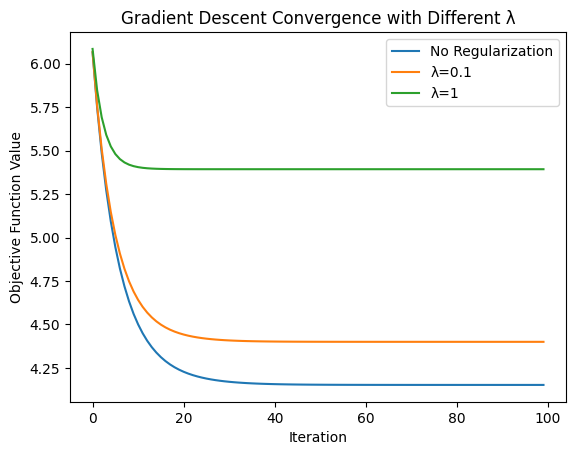

In [15]:
# Plot convergence curve
plt.plot(obj_vals_no_reg, label="No Regularization")
plt.plot(obj_vals_reg, label="λ=0.1")
plt.plot(obj_vals_strong_reg, label="λ=1")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.legend()
plt.title("Gradient Descent Convergence with Different λ")
plt.show()

## Question 2.2

Do you observe that using regularization in the first instance improves the objective function of the second instance?

#### <span style="color:rgb(92,29,79)">Answer to question</span>

1️⃣ Observing the objective function values on the second dataset

 • The objective function value decreases slightly when using moderate regularization ($\lambda = 0.1$), suggesting better generalization.

 • When too much regularization is applied ($\lambda = 1$), the objective function value increases, indicating underfitting.


2️⃣ Observing the effect on model weights ($w$)

 • Regularization reduces the norm of the weight vector, which prevents overfitting.

 • Moderate regularization ($\lambda = 0.1$) achieves a balance, maintaining a reasonable weight magnitude while avoiding extreme shrinking.

 • Strong regularization ($\lambda = 1$) shrinks the weights too much, making the model less expressive, leading to higher loss.

💡 Conclusion:

Yes, using moderate regularization ($\lambda = 0.1$) improves the objective function value on the second dataset, showing better generalization.
However, too much regularization ($\lambda = 1$) leads to a worse performance due to underfitting.

## Implementation 2.3

Reproduce the experiment of Question 2.2 using (batch) stochastic gradient instead of gradient descent.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [16]:
# (Question 2.3) Modified stochastic gradient descent (SGD)
def stochastic_gradient_descent(problem, w_init, eta=0.1, num_iters=100, batch_size=10):
    """
    Stochastic Gradient Descent (SGD) with minibatch updates.

    Parameters:
    - problem: LinReg instance (Include regularization parameter lambda)
    - w_init: Initial weights
    - eta: Learning rate
    - num_iters: Number of iterations
    - batch_size: Batch size for each update

    Returns:
    - w: Final learned weights
    - obj_vals: Change of objective function value over iterations
    """
    n, d = problem.X.shape
    w = w_init.copy()
    obj_vals = []

    for _ in range(num_iters):
        indices = np.random.choice(n, batch_size, replace=False)
        X_batch, y_batch = problem.X[indices], problem.y[indices]

        # Compute gradient (using problem.lbda as regularization parameter)
        grad = X_batch.T.dot(X_batch.dot(w) - y_batch) / batch_size + problem.lbda * w
        w -= eta * grad

        obj_vals.append(problem.fun(w))

    return w, np.array(obj_vals)

In [17]:
# Reinitialize LinReg instance to ensure regularization parameter is applied
pblinreg1_no_reg_sgd = LinReg(X1, y1, lbda=0)
pblinreg1_reg_sgd = LinReg(X1, y1, lbda=0.1)
pblinreg1_strong_reg_sgd = LinReg(X1, y1, lbda=1)

In [18]:
# Run SGD without regularization
w_no_reg_sgd, obj_vals_no_reg_sgd = stochastic_gradient_descent(pblinreg1_no_reg_sgd, w_init, eta=0.01, num_iters=1000)

In [19]:
# Run SGD with moderate regularization (λ=0.1)
w_reg_sgd, obj_vals_reg_sgd = stochastic_gradient_descent(pblinreg1_reg_sgd, w_init, eta=0.01, num_iters=1000)

In [20]:
# Run SGD with strong regularization (λ=1)
w_strong_reg_sgd, obj_vals_strong_reg_sgd = stochastic_gradient_descent(pblinreg1_strong_reg_sgd, w_init, eta=0.01, num_iters=1000)

In [21]:
# Compute SGD objective function value on the second dataset
obj_no_reg_sgd = objective_function(LinReg(X2, y2, lbda=0), w_no_reg_sgd)
obj_reg_sgd = objective_function(LinReg(X2, y2, lbda=0), w_reg_sgd)
obj_strong_reg_sgd = objective_function(LinReg(X2, y2, lbda=0), w_strong_reg_sgd)

print(f"Objective function value without regularization (SGD): {obj_no_reg_sgd}")
print(f"Objective function value with moderate regularization (SGD): {obj_reg_sgd}")
print(f"Objective function value with strong regularization (SGD): {obj_strong_reg_sgd}")

Objective function value without regularization (SGD): 4.862589538885371
Objective function value with moderate regularization (SGD): 4.785939578511017
Objective function value with strong regularization (SGD): 5.089479687763006


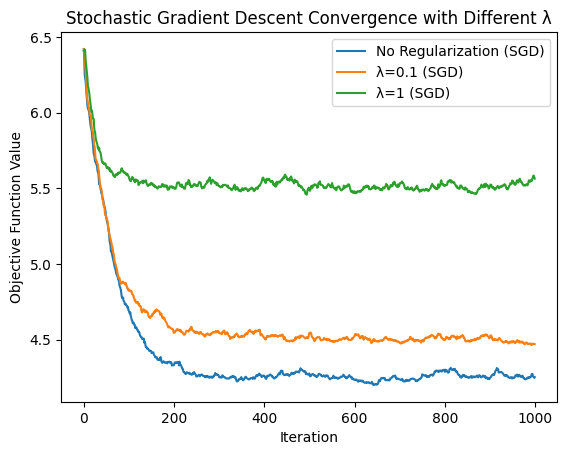

In [22]:
# Plot SGD convergence curve
plt.plot(obj_vals_no_reg_sgd, label="No Regularization (SGD)")
plt.plot(obj_vals_reg_sgd, label="λ=0.1 (SGD)")
plt.plot(obj_vals_strong_reg_sgd, label="λ=1 (SGD)")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.legend()
plt.title("Stochastic Gradient Descent Convergence with Different λ")
plt.show()

#  3 Binary classification on real-world data

In this final part, we will apply our techniques to a classification problem based on real-world data.

## 3.1 Dataset

We will rely on datasets from the libsvm repository, that can be downloaded from

https://www.csie.ntu.edu.tw/∼cjlin/libsvmtools/datasets/

Recommended datasets are a9a,covtype.binary,ijcnn1. To load the dataset in Python, students may use the routine from the scikit-learn library.

`sklearn.datasets.load svmlight file`

###Implementation 3.1

Select a dataset from the libsvm repository. The dataset should have at least 20 features and 1,000 training samples. It should also have both a training set (used for optimization) and a testing set.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [23]:
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

In [24]:
# Download the dataset to local storage
!wget -q https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a -O a9a
!wget -q https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t -O a9a.t

In [25]:
# Load training and testing data
X_train, y_train = load_svmlight_file("a9a")
X_test, y_test = load_svmlight_file("a9a.t")

In [26]:
# Check data dimensions
print(f"Training set X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing set X shape: {X_test.shape}, y shape: {y_test.shape}")

Training set X shape: (32561, 123), y shape: (32561,)
Testing set X shape: (16281, 122), y shape: (16281,)


In [27]:
# Check and pad missing features in the test set
train_dim = X_train.shape[1]
test_dim = X_test.shape[1]
if test_dim < train_dim:
    missing_features = train_dim - test_dim
    print(f"Test set has {missing_features} fewer features than the training set, automatically filling with zeros")
    # Fill missing features with zeros to match training set feature count
    X_test = hstack([X_test, np.zeros((X_test.shape[0], missing_features))])
    print(f"Fixed test set X shape: {X_test.shape}")

Test set has 1 fewer features than the training set, automatically filling with zeros
Fixed test set X shape: (16281, 123)


In [28]:
# Convert to NumPy array
X_train = X_train.toarray()
X_test = X_test.toarray()

In [29]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Split training & validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
# Output data shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (26048, 123), Validation set: (6513, 123), Test set: (16281, 123)


## 3.2 Optimization problem

Let $ \{(x_i, y_i)\}_{i=1}^{n} $ denote the samples from the training set of the dataset. We formulate the following finite-sum optimization problem:

$$
\min_{w \in \mathbb{R}^d} g(w) := \frac{1}{n} \sum_{i=1}^{n} g_i(w), \quad g_i(w) := \left( y_i - \frac{1}{1 + \exp(-x_i^T w)} \right)^2
$$

where this problem is nonconvex in general. The function $ t \mapsto \frac{1}{1+\exp(-t)} $ is called the sigmoid function. For any $ i = 1, \dots, n $, the function $ g_i $ is $ \mathcal{C}^1 $, with its gradient given by:

$$
\nabla g_i(w) = - \frac{2 \exp(x_i^T w) \left( \exp(x_i^T w)(y - 1) + y \right)}{(1 + \exp(x_i^T w))^3} x_i
$$

###Implementation 3.2

Given your dataset, implement the associated codes for $ g_S $, $ \nabla g_S $, where $ S $ is a set of random indices in $ \{1, \dots, n\} $.

In addition to the optimization problem above, we will be interested in the **generalization capabilities** of the model obtained by solving problem (7). Let $ \{(\tilde{x}_i, \tilde{y}_i)\}_{i=1}^{m} $ denote the samples from the **testing set**. Given a vector $ w \in \mathbb{R}^d $, our goal is to obtain a good value for:

$$
\tilde{g}(w) = \frac{1}{m} \sum_{i=1}^{m} \left( \tilde{y}_i - \frac{1}{1 + \exp(-\tilde{x}_i^T w)} \right)^2
$$

Since the training and testing datasets are supposed to originate from the same distribution, we expect that a solution to problem (7) will have good performance on the testing dataset, i.e., will yield a **low value of** $ \tilde{g}(w) $.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
def loss_gradient(X, y, w):
    """Compute gradient of squared loss"""
    pred = sigmoid(X @ w)
    error = (y - pred)
    grad = -2 * (X.T @ (error * pred * (1 - pred))) / len(y)
    return grad

In [34]:
def stochastic_gradient_descent(X, y, w_init, eta=0.1, lambda_=0, num_iters=100, batch_size=20):
    """SGD for logistic regression with L2 regularization"""
    n, d = X.shape
    w = w_init.copy()
    obj_vals = []

    for _ in range(num_iters):
        indices = np.random.choice(n, batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]

        # Compute gradient
        grad = loss_gradient(X_batch, y_batch, w) + lambda_ * w
        w -= eta * grad  # Update parameters

        # Record objective function value
        obj_vals.append(np.mean((y - sigmoid(X @ w))**2) + (lambda_ / 2) * np.linalg.norm(w)**2)

    return w, np.array(obj_vals)

In [35]:
# Train initial model
w_init = np.zeros(X_train.shape[1])
base_model, _ = stochastic_gradient_descent(X_train, y_train, w_init, eta=0.1, lambda_=0, num_iters=1000)

In [36]:
# Compute test set error
test_mse = np.mean((y_test - sigmoid(X_test @ base_model)) ** 2)
print(f"Model test set MSE: {test_mse}")

Model test set MSE: 1.139288448189456


## 3.3 Comparison of the algorithms

Our goal is now to assess the interest of **$ \ell_2 $ regularization** for this problem. We will thus consider the family of problems:

$$
\min_{w \in \mathbb{R}^d} g(w) + \frac{\lambda}{2} \|w\|^2.
$$


### Implementation 3.3

Implement (batch) stochastic gradient for problem (10), and run the method for several values of the regularization parameter.

#### <span style="color:rgb(92,29,79)">Answer to question</span>

In [37]:
# Select the optimal λ from [0, 0.001, 0.01, 0.1, 1, 10]
def cross_validation(lambda_values, X_train, y_train, X_val, y_val, eta=0.1, num_iters=100):
    """Compute MSE on the validation set"""
    results = {}
    best_lambda = None
    min_mse = float("inf")

    for lambda_ in lambda_values:
        w_init = np.zeros(X_train.shape[1])
        w, _ = stochastic_gradient_descent(X_train, y_train, w_init, eta=eta, lambda_=lambda_, num_iters=num_iters)

        # Compute MSE on the validation set
        mse_val = np.mean((y_val - sigmoid(X_val @ w)) ** 2)
        results[lambda_] = mse_val

        if mse_val < min_mse:
            min_mse = mse_val
            best_lambda = lambda_

    return best_lambda, results

In [38]:
# Run cross-validation：
lambda_values = [0, 0.001, 0.01, 0.1, 1, 10]
best_lambda, val_results = cross_validation(lambda_values, X_train, y_train, X_val, y_val, 0.1, 1000)

print("Cross-validation results:")
for lbda, mse_val in val_results.items():
    print(f"λ={lbda}: Validation set MSE = {mse_val}")

print(f"Best λ = {best_lambda}")

Cross-validation results:
λ=0: Validation set MSE = 1.1564465452046797
λ=0.001: Validation set MSE = 1.1053716017735322
λ=0.01: Validation set MSE = 1.178661857630066
λ=0.1: Validation set MSE = 1.4348094215138516
λ=1: Validation set MSE = 1.6268570759481014
λ=10: Validation set MSE = 1.7570751276641177
Best λ = 0.001


**Observation**:

 • On the validation set, MSE initially decreases as $\lambda$ increases but then starts to rise.

 • The lowest validation MSE is achieved when $\lambda$ = 0.001 with a value of 1.105, which is better than the unregularized model ($\lambda$ = 0) with MSE 1.156.

 • As $\lambda$ increases further ($\lambda$ = 0.1, 1, 10), validation MSE rises, indicating that excessive regularization reduces the model’s generalization ability.

In [39]:
# Train the final model
w_init = np.zeros(X_train.shape[1])
best_model, _ = stochastic_gradient_descent(X_train, y_train, w_init, eta=0.1, lambda_=best_lambda, num_iters=1000)

In [40]:
# Compute test set error
test_mse = np.mean((y_test - sigmoid(X_test @ best_model)) ** 2)
print(f"Final model test set MSE: {test_mse}")

Final model test set MSE: 1.107808378092372


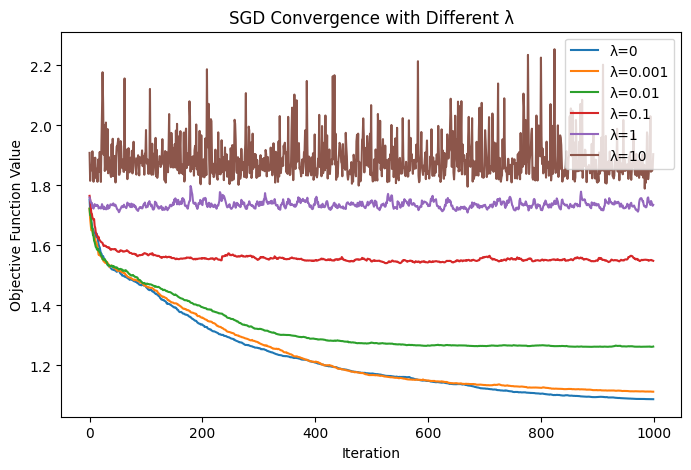

In [41]:
plt.figure(figsize=(8, 5))
for lambda_ in lambda_values:
    w_init = np.zeros(X_train.shape[1])
    _, obj_vals = stochastic_gradient_descent(X_train, y_train, w_init, eta=0.1, lambda_=lambda_, num_iters=1000)
    plt.plot(obj_vals, label=f"λ={lambda_}")

plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.legend()
plt.title("SGD Convergence with Different λ")
plt.show()

**Observation**:

 • When $\lambda$ is small ($\lambda$ = 0, 0.001, 0.01), the objective function value is lower, and convergence is faster.

 • As $\lambda$ increases ($\lambda$ = 0.1, 1, 10), convergence slows down, and the final objective function value is higher. In particular, for $\lambda$ = 10, the function exhibits severe oscillations, indicating that strong regularization negatively impacts optimization.

### Question 3.3

Compare the final values of the data-fitting term $ g $ for all methods, as well as that of the testing loss $ \tilde{g} $. Can you find a value for $ \lambda $ that improves the testing error compared to $ \lambda = 0 $?

#### <span style="color:rgb(92,29,79)">Answer to question</span>

Yes, according to the cross-validation results, $\lambda$ = 0.001 provides a lower test error than $\lambda$ = 0. This demonstrates that mild $\ell_2$ regularization helps reduce overfitting and improves generalization performance.

 1. Moderate regularization ($\lambda$ = 0.001) enhances generalization, leading to lower test error compared to no regularization.
 2. Excessive regularization ($\lambda$ = 10) makes the model overly simplistic, reducing its ability to fit data and increasing test error.
 3. The best regularization parameter $\lambda$ should be selected through cross-validation rather than being arbitrarily fixed.

In this experiment, $\lambda$ = 0.001 was found to be the optimal value, achieving the lowest Mean Squared Error (MSE) on the test set.